# Project: Wrangling and Analyze Data
### Introduction
The main goal of this project is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. After that, showcasing of the wrangling efforts is conducted in a Jupyter Notebook. last but not the least, the wrangled data is analyzed and visualized using chart. 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy 
import json 

In [2]:
# Read csv file
df_tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", allow_redirects=True)
open('image_predictions.tsv', 'wb').write(response.content)
df_img = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
df_img 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Read downloaded json file into a tweet_json DataFrame
rows = []

with open('tweet_json.txt', encoding="utf-8") as file:
    row = file.readlines()
    for line in row:
        parsed_tweets = json.loads(line)
        tweets_id = parsed_tweets['id']
        retweets_count = parsed_tweets['retweet_count']
        favrite_count = parsed_tweets['favorite_count']
        rows.append({'tweet_id':tweets_id,
                       'retweet_count': retweets_count,
                       'favorite_count': favrite_count})
        
df_tweet_json = pd.DataFrame(rows, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
df_tweet_json 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

## Visual Assessement

In [8]:
df_tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Data Programmatic Assessment
#### We can use Pandas functions with Pandas methods to carry out our data assessment.

In [11]:
# assessing overall df_tweets_archive dataframe
df_tweets_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Assessing df_tweets_archive expanded_urls column for data issues
df_tweets_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [13]:
# Assessing df_tweets_archive source column for data issues
df_tweets_archive["source"].value_counts()  

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# assessing overall df_img dataframe
df_img.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# assessing overall df_img dataframe
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
# Assessing df_img jpg_url column for duplicated data
sum(df_img['jpg_url'].duplicated()) 

66

In [17]:
# assessing overall df_tweet_json dataframe
df_tweet_json.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Remove duplicate url's in expanded_urls column that appear twice in a row by spliting the expanded_urls column using str.split() function

2. Remove 78 replies from in_reply_to_status_id and in_reply_to_user_id columns 

3. Remove 181 replies from retweeted_status_id  retweeted_status_user_id  and retweeted_status_timestamp columns

4. Remove unnecessary data from df_tweets_archive_clean name column such as "an", "None", "the" and "a"

5. Drop unneccessary columns from the dataframe

6. Remove trailing +0000 from df_tweets_archive_clean timestamp column and use pd.to_datetime to convert timestamp from string to datetime

7. Remove url's not related to twitter from the df_tweets_archive_clean expanded_urls column.

8. Drop unneccessary nan values from df_tweets_archive_clean expanded_urls column 

9. Removing url's not belonging to 'We rate dogs' from the df_tweets_archive_clean expanded_urls column

## Cleaning Data
cleaning **all** of the issues and documenting them while assessing the data. 


In [17]:
# Make copies of original pieces of data
df_tweets_archive_clean = df_tweets_archive.copy()
df_img_clean = df_img.copy()
df_tweet_json_clean = df_tweet_json.copy()   

### Issue #1:

In [18]:
df_tweets_archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

### Define
Remove duplicate url's in expanded_urls column that appear twice in a row by spliting the expanded_urls column using str.split() function

### Code

In [19]:
# Removing duplicates in expanded_urls column 
df_tweets_archive_clean["expanded_single_urls"] = df_tweets_archive_clean["expanded_urls"].str.split(",").str[0] 
df_tweets_archive_clean.drop("expanded_urls", axis=1, inplace=True)
df_tweets_archive_clean.rename(columns={"expanded_single_urls":"expanded_urls"}, inplace=True)

### Test

In [20]:
# Testing if the duplicated url's have been removed in expanded_urls column 
df_tweets_archive_clean['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/700143752053182464/photo/1    2
https://twitter.com/dog_rates/status/667138269671505920/photo/1    2
https://twitter.com/dog_rates/status/837820167694528512/photo/1    2
https://twitter.com/dog_rates/status/712809025985978368/photo/1    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1    2
                                                                  ..
https://twitter.com/dog_rates/status/753398408988139520/video/1    1
https://twitter.com/dog_rates/status/753420520834629632/video/1    1
https://twitter.com/dog_rates/status/753655901052166144/photo/1    1
https://twitter.com/dog_rates/status/754011816964026368/photo/1    1
https://twitter.com/dog_rates/status/666020888022790149/photo/1    1
Name: expanded_urls, Length: 2140, dtype: int64

### Issue #2:

In [21]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

In [22]:
# checking for non zero values in retweeted_status_id
for nonzero in df_tweets_archive_clean.retweeted_status_id:
    print(nonzero)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
8.874739571039519e+17
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
8.860537344211026e+17
nan
nan
nan
8.305833205850685e+17
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
8.780576130401157e+17
nan
nan
nan
nan
8.782815110064783e+17
6.690003974455337e+17
nan
nan
nan
8.76850772322988e+17
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
8.663349647612027e+17
nan
nan
nan
8.688803978194944e+17
nan
8.732137756329779e+17
nan
nan
nan
8.726575842595512e+17
nan
nan
nan
nan
nan
nan
nan
8.41077006473257e+17
nan
nan
nan
nan
nan
nan
nan
nan
8.591969789027738e+17
nan
nan
nan
nan
nan
8.685522785248379e+17
nan
nan
nan
nan
nan
8.650134204453683e+17
nan
8.664507055314575e+17
nan
nan
nan
nan
8.378201676945285e+17
nan
nan
nan
nan
nan
nan
nan
nan
8.630624715311677e+17
nan
nan
nan
nan
nan
nan
nan
nan
8.06629075125203e+17
nan
nan
nan
8.605637731402097e+17
8.6

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


### Define 
Remove 78 replies from in_reply_to_status_id and in_reply_to_user_id columns

### Code

In [23]:
# Remove all the values in in_reply_to_status_id and in_reply_to_user_id columns
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['in_reply_to_status_id'].isnull()]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['in_reply_to_user_id'].isnull()]

### Test

In [24]:
# testing to confirm if values from in_reply_to_status_id and in_reply_to_user_id columns are removed
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2278 non-null   int64  
 10  rating_denominator          2278 non-null   int64  
 11  name                        2278 non-null   object 
 12  doggo                       2278 non-null   object 
 13  floofer                     2278 

### Issue #3:

In [25]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2278 non-null   int64  
 10  rating_denominator          2278 non-null   int64  
 11  name                        2278 non-null   object 
 12  doggo                       2278 non-null   object 
 13  floofer                     2278 

### Define   
Remove 181 replies from retweeted_status_id  retweeted_status_user_id  and retweeted_status_timestamp columns

### Code

In [26]:
# Remove all the values in retweeted_status_id retweeted_status_user_id and retweeted_status_timestamp
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['retweeted_status_id'].isnull()]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['retweeted_status_user_id'].isnull()]
df_tweets_archive_clean = df_tweets_archive_clean[df_tweets_archive_clean['retweeted_status_timestamp'].isnull()]

### Test

In [27]:
# testing to confirm if values from retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are removed
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   rating_numerator            2097 non-null   int64  
 10  rating_denominator          2097 non-null   int64  
 11  name                        2097 non-null   object 
 12  doggo                       2097 non-null   object 
 13  floofer                     2097 

### Issue #4:

In [28]:
df_tweets_archive_clean[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"])]["name"]

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 672, dtype: object

### Define 
Remove unnecessary data from df_tweets_archive_clean name column such as "an", "None", "the" and "a"

### Code

In [29]:
# remove "an", "None", "the" and "a" 
df_tweets_archive_clean.loc[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"]), "name"] = np.nan

### Test

In [30]:
# Test to see the output of our changes 
df_tweets_archive_clean[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"])]["name"]

Series([], Name: name, dtype: object)

### Issue #5:

In [31]:
df_tweets_archive_clean.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'expanded_urls']

### Define 
Drop unneccessary columns from the df_tweets_archive_clean dataframe

### Code

In [32]:
# Drop unneccessary columns from the dataframe
df_tweets_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'
                       , 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_tweets_archive_clean.reset_index(drop=True, inplace=True) 

### Test

In [33]:
# check the columns of our dataframe
df_tweets_archive_clean.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'expanded_urls']

### Issue #6:

In [34]:
df_tweets_archive_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:56 +0000
1,2017-08-01 00:17:27 +0000
2,2017-07-31 00:18:03 +0000
3,2017-07-30 15:58:51 +0000
4,2017-07-29 16:00:24 +0000
...,...
2092,2015-11-16 00:24:50 +0000
2093,2015-11-16 00:04:52 +0000
2094,2015-11-15 23:21:54 +0000
2095,2015-11-15 23:05:30 +0000


## Define 
Remove trailing +0000 from df_tweets_archive_clean timestamp column and use pd.to_datetime to convert timestamp from string to datetime

## code

In [35]:
# Remove trailing +0000 from timestamp
df_tweets_archive_clean['timestamp'] = df_tweets_archive_clean['timestamp'].str[0:18]

# Convert the timestamp column to datetime
df_tweets_archive_clean['timestamp'] = pd.to_datetime(df_tweets_archive_clean['timestamp'])

#### references
#### https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

### Test

In [36]:
# Test to see the timestamp column data
df_tweets_archive_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:05
1,2017-08-01 00:17:02
2,2017-07-31 00:18:00
3,2017-07-30 15:58:05
4,2017-07-29 16:00:02
...,...
2092,2015-11-16 00:24:05
2093,2015-11-16 00:04:05
2094,2015-11-15 23:21:05
2095,2015-11-15 23:05:03


### Issue #7:


In [37]:
for invalid_url in df_tweets_archive_clean.expanded_urls:
    print(invalid_url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/vide

https://twitter.com/dog_rates/status/693622659251335168/photo/1
https://twitter.com/dog_rates/status/693590843962331137/photo/1
https://twitter.com/dog_rates/status/693486665285931008/video/1
https://twitter.com/dog_rates/status/693280720173801472/photo/1
https://vine.co/v/i5n2irFUYWv
https://twitter.com/dog_rates/status/693262851218264065/photo/1
https://twitter.com/dog_rates/status/693231807727280129/photo/1
https://twitter.com/dog_rates/status/693155686491000832/photo/1
https://twitter.com/dog_rates/status/693109034023534592/video/1
https://twitter.com/dog_rates/status/693095443459342336/photo/1
https://twitter.com/dog_rates/status/692919143163629568/photo/1
https://twitter.com/dog_rates/status/692905862751522816/photo/1
https://twitter.com/dog_rates/status/692901601640583168/photo/1
https://twitter.com/dog_rates/status/692894228850999298/photo/1
https://twitter.com/dog_rates/status/692828166163931137/photo/1
https://twitter.com/dog_rates/status/692752401762250755/photo/1
https://tw

### Define
Remove url's not related to twitter from the df_tweets_archive_clean expanded_urls column.

### Code

In [38]:
### geeting rid of url's not related to twitter 
invalied_url = ["vine.co","gofundme","m.youtube.com", "us.blastingnews.com","weratedogs.com","petfinder","facebook.com","http://goo.gl","loveyourmelon.com", "patreon"]
for url in invalied_url:
    df_tweets_archive_clean = df_tweets_archive_clean[~df_tweets_archive_clean.expanded_urls.str.contains(url, na=False)]

### Test

In [39]:
# Testing to see if url not related to twitter are removed
for invalid_url in df_tweets_archive_clean.expanded_urls:
    print(invalid_url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/688804835492233216/photo/1
https://twitter.com/dog_rates/status/688789766343622656/photo/1
https://twitter.com/dog_rates/status/688547210804498433/photo/1
https://twitter.com/dog_rates/status/688519176466644993/photo/1
https://twitter.com/dog_rates/status/688385280030670848/photo/1
https://twitter.com/dog_rates/status/688211956440801280/video/1
https://twitter.com/dog_rates/status/688179443353796608/photo/1
https://twitter.com/dog_rates/status/688116655151435777/photo/1
https://twitter.com/dog_rates/status/688064179421470721/photo/1
https://twitter.com/dog_rates/status/687826841265172480/photo/1
https://twitter.com/dog_rates/status/687818504314159109/photo/1
https://twitter.com/dog_rates/status/687807801670897665/photo/1
https://twitter.com/dog_rates/status/687704180304273409/photo/1
https://twitter.com/dog_rates/status/687664829264453632/photo/1
https://twitter.com/dog_rates/status/687494652870668288/photo/1
https://twitter.com/dog_rates/status/687

### Issue #8:

In [40]:
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/687317306314240000/photo/1
https://twitter.com/dog_rates/status/687312378585812992/photo/1
https://twitter.com/dog_rates/status/687127927494963200/photo/1
https://twitter.com/dog_rates/status/687124485711986689/photo/1
https://twitter.com/dog_rates/status/687109925361856513/photo/1
https://twitter.com/dog_rates/status/687102708889812993/photo/1
https://twitter.com/dog_rates/status/687096057537363968/photo/1
https://twitter.com/dog_rates/status/686947101016735744/photo/1
https://twitter.com/dog_rates/status/686749460672679938/photo/1
https://twitter.com/dog_rates/status/686730991906516992/photo/1
https://twitter.com/dog_rates/status/686683045143953408/photo/1
https://twitter.com/dog_rates/status/686618349602762752/photo/1
https://twitter.com/dog_rates/status/686606069955735556/photo/1
https://twitter.com/dog_rates/status/686386521809772549/photo/1
https://twitter.com/dog_rates/status/686377065986265092/photo/1
https://twitter.com/dog_rates/status/686

### Define
Drop unneccessary nan values from df_tweets_archive_clean expanded_urls column

### Code

In [41]:
# drop all nan values from expanded_urls in the df_tweets_archive_clean dataframe
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['expanded_urls'])

### Test

In [42]:
# Test our url's for nan values
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/686050296934563840/photo/1
https://twitter.com/dog_rates/status/686034024800862208/photo/1
https://twitter.com/dog_rates/status/686007916130873345/photo/1
https://twitter.com/dog_rates/status/686003207160610816/photo/1
https://twitter.com/dog_rates/status/685973236358713344/photo/1
https://twitter.com/dog_rates/status/685943807276412928/video/1
https://twitter.com/dog_rates/status/685906723014619143/photo/1
https://twitter.com/dog_rates/status/685667379192414208/photo/1
https://twitter.com/dog_rates/status/685663452032069632/video/1
https://twitter.com/dog_rates/status/685641971164143616/photo/1
https://twitter.com/dog_rates/status/685547936038666240/photo/1
https://twitter.com/dog_rates/status/685532292383666176/photo/1
https://twitter.com/dog_rates/status/685325112850124800/photo/1
https://twitter.com/dog_rates/status/685321586178670592/photo/1
https://twitter.com/dog_rates/status/685315239903100929/photo/1
https://twitter.com/dog_rates/status/685

In [43]:
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1972 non-null   int64         
 1   timestamp           1972 non-null   datetime64[ns]
 2   source              1972 non-null   object        
 3   text                1972 non-null   object        
 4   rating_numerator    1972 non-null   int64         
 5   rating_denominator  1972 non-null   int64         
 6   name                1358 non-null   object        
 7   doggo               1972 non-null   object        
 8   floofer             1972 non-null   object        
 9   pupper              1972 non-null   object        
 10  puppo               1972 non-null   object        
 11  expanded_urls       1972 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 200.3+ KB


### Issue #8:

In [44]:
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/685307451701334016/photo/1
https://twitter.com/dog_rates/status/685268753634967552/photo/1
https://twitter.com/dog_rates/status/685198997565345792/photo/1
https://twitter.com/dog_rates/status/685169283572338688/photo/1
https://twitter.com/dog_rates/status/684959798585110529/photo/1
https://twitter.com/dog_rates/status/684940049151070208/photo/1
https://twitter.com/dog_rates/status/684926975086034944/photo/1
https://twitter.com/dog_rates/status/684914660081053696/photo/1
https://twitter.com/dog_rates/status/684902183876321280/photo/1
https://twitter.com/dog_rates/status/684880619965411328/photo/1
https://twitter.com/dog_rates/status/684800227459624960/photo/1
https://twitter.com/dog_rates/status/684594889858887680/photo/1
https://twitter.com/dog_rates/status/684567543613382656/photo/1
https://twitter.com/dog_rates/status/684481074559381504/photo/1
https://twitter.com/dog_rates/status/684460069371654144/photo/1
https://twitter.com/dog_rates/status/684

### Define
Removing url's not belonging to 'We rate dogs' from the df_tweets_archive_clean expanded_urls column

### Code

In [45]:
# remove urls not related to 'We rate dogs' 
df_tweets_archive_clean = df_tweets_archive_clean.loc[df_tweets_archive_clean["expanded_urls"].str.contains("https://twitter.com/dog_rates",na=False)]

### Test

In [46]:
# Test our output
for dog_rates in df_tweets_archive_clean.expanded_urls:
    print(dog_rates)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/682662431982772225/photo/1
https://twitter.com/dog_rates/status/682638830361513985/photo/1
https://twitter.com/dog_rates/status/682429480204398592/photo/1
https://twitter.com/dog_rates/status/682406705142087680/photo/1
https://twitter.com/dog_rates/status/682393905736888321/photo/1
https://twitter.com/dog_rates/status/682389078323662849/photo/1
https://twitter.com/dog_rates/status/682303737705140231/photo/1
https://twitter.com/dog_rates/status/682259524040966145/photo/1
https://twitter.com/dog_rates/status/682242692827447297/photo/1
https://twitter.com/dog_rates/status/682059653698686977/photo/1
https://twitter.com/dog_rates/status/682047327939461121/photo/1
https://twitter.com/dog_rates/status/682032003584274432/photo/1
https://twitter.com/dog_rates/status/682003177596559360/photo/1
https://twitter.com/dog_rates/status/681981167097122816/photo/1
https://twitter.com/dog_rates/status/681891461017812993/photo/1
https://twitter.com/dog_rates/status/681

### Tidiness Issues 

### Tidiness 1

In [47]:
df_tweets_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1904
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Define 
Clean the data in df_tweets_archive_clean source column by splitting the column into two columns to accomodate the source_name and the source_url

### Code

In [48]:
# Split source column into source_name and source_url and drop the source column
df_tweets_archive_clean["source_name"] = df_tweets_archive_clean["source"].str.extract(">(.*)<")
df_tweets_archive_clean["source_url"] = df_tweets_archive_clean["source"].str.extract('href="(.*?)"')
df_tweets_archive_clean.drop(columns="source", inplace=True)

### Test

In [49]:
# Test to see the output of splitting the source column into two
df_tweets_archive_clean[['source_name', 'source_url']].value_counts()

source_name         source_url                                  
Twitter for iPhone  http://twitter.com/download/iphone              1904
Twitter Web Client  http://twitter.com                                28
TweetDeck           https://about.twitter.com/products/tweetdeck      11
dtype: int64

### Tidiness 2
### Define
Melt doggo, floofer, pupper, puppo into a single column called dog_stage_name since they are all stages of dogs

## Code

In [50]:
# Use melt function to melt all the dogs stage name into a single column 
df_tweets_archive_clean = pd.melt(df_tweets_archive_clean.reset_index(), 
                                id_vars = ['tweet_id', 'timestamp', 'source_name','source_url', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'stages', 
                                value_name = 'dog_stage_name')

# Drop stages column  
df_tweets_archive_clean.drop('stages', 1, inplace = True)

# Sort the dog stages by dog_stage_name and drop all duplicated values
df_tweets_archive_clean = df_tweets_archive_clean.sort_values('dog_stage_name').drop_duplicates(subset='tweet_id', keep='last')

C:\Users\N-POWER\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


### Test

In [51]:
# Check the stages of dogs
df_tweets_archive_clean.dog_stage_name.value_counts()

None       1646
pupper      208
doggo        60
puppo        21
floofer       8
Name: dog_stage_name, dtype: int64

In [52]:
# confirm new column dog_stage_name from df_tweets_archive_clean dataframe
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 1867 to 6332
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1943 non-null   int64         
 1   timestamp           1943 non-null   datetime64[ns]
 2   source_name         1943 non-null   object        
 3   source_url          1943 non-null   object        
 4   text                1943 non-null   object        
 5   expanded_urls       1943 non-null   object        
 6   rating_numerator    1943 non-null   int64         
 7   rating_denominator  1943 non-null   int64         
 8   name                1357 non-null   object        
 9   dog_stage_name      1943 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 167.0+ KB


### Tidiness 3



### Define
2. Merge df_tweets_archive_clean, df_img_clean and df_tweet_json_clean tables into a single table(dataset)

### Code

In [53]:
# Merge the df_tweets_archive_clean and the df_img_clean together
df_twitter_final = pd.merge(df_tweets_archive_clean, 
                      df_img_clean, 
                      how="inner", on="tweet_id")

### Test

In [54]:
# Test our result
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1943 non-null   int64         
 1   timestamp           1943 non-null   datetime64[ns]
 2   source_name         1943 non-null   object        
 3   source_url          1943 non-null   object        
 4   text                1943 non-null   object        
 5   expanded_urls       1943 non-null   object        
 6   rating_numerator    1943 non-null   int64         
 7   rating_denominator  1943 non-null   int64         
 8   name                1357 non-null   object        
 9   dog_stage_name      1943 non-null   object        
 10  jpg_url             1943 non-null   object        
 11  img_num             1943 non-null   int64         
 12  p1                  1943 non-null   object        
 13  p1_conf             1943 non-null   float64     

In [55]:
# merge the remaining df_tweet_json_clean to our previous table
df_twitter_final = pd.merge(df_twitter_final, df_tweet_json_clean,
                      how = 'inner', on ="tweet_id")
# check the new dataset
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1943 non-null   int64         
 1   timestamp           1943 non-null   datetime64[ns]
 2   source_name         1943 non-null   object        
 3   source_url          1943 non-null   object        
 4   text                1943 non-null   object        
 5   expanded_urls       1943 non-null   object        
 6   rating_numerator    1943 non-null   int64         
 7   rating_denominator  1943 non-null   int64         
 8   name                1357 non-null   object        
 9   dog_stage_name      1943 non-null   object        
 10  jpg_url             1943 non-null   object        
 11  img_num             1943 non-null   int64         
 12  p1                  1943 non-null   object        
 13  p1_conf             1943 non-null   float64     

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
# Saving our cleaned dataset into a new twitter_archive_master dataset
df_twitter_final.to_csv('twitter_archive_master.csv', header=True, index=False)

In [57]:
# checking the columns in our dataset
df_twitter_final.columns

Index(['tweet_id', 'timestamp', 'source_name', 'source_url', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage_name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
# define a bar function for our data visualization
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(20,10)):
    #define stylesheet of the barplot
    sns.set_style('darkgrid')

    # plot the data on a barplot chart

    column.plot(kind='bar', figsize=figsize);
    plt.title(title, fontsize = 14);
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12);
    plt.yticks(fontsize = 11)
    plt.show()

### Insights:
1.  Checking the dog stage name with the highest retweets and favorite count

2.  Checking which dog stage is the most popular among all the stages

3.  Which dog have the highest breed?

4. Which dog has the most popular name

### Visualization

#### Insights and visualization 1
1. Checking the dog stage name with the highest retweets and favorite count 

In [59]:
# Checking the dog stage name with the highest retweets and favorite count 
df_twitter_final_temp = df_twitter_final.groupby("dog_stage_name")[["retweet_count", "favorite_count"]].mean()
df_twitter_final_temp

,retweet_count,favorite_count
dog_stage_name,,
None,2599.735115,8526.574727
doggo,7350.433333,19866.050000
floofer,4776.750000,13701.375000
pupper,2463.432692,7479.076923
puppo,7560.523810,24271.571429


puppo is having 7560.523810 retweet count which is the highest retweet in average and it still recorded the highest favorite count with 24271.571429 in average while pupper is the least having 2463.432692 retweet count which is the lowest retweet in average and it still recorded the lowest favorite count with 7479.076923 in average.

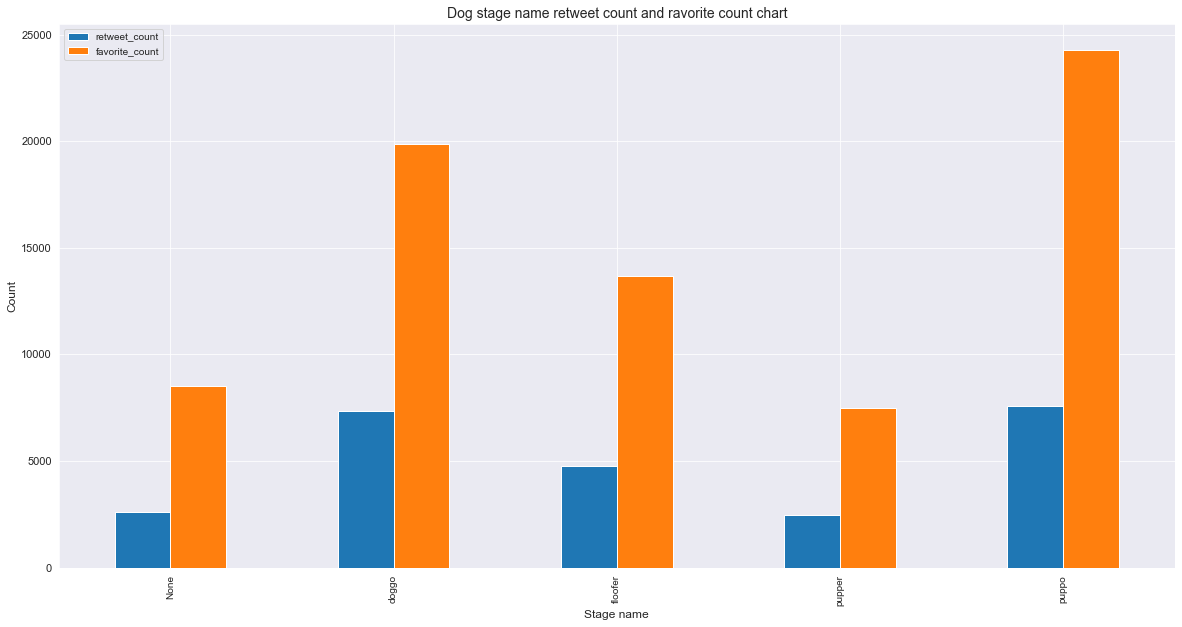

In [60]:
# calling the barplot function to visualize our retweet_count and favorite_count data
barplot(df_twitter_final_temp, 'Dog stage name retweet count and ravorite count chart' , 'Stage name', 'Count')

### Insight 2
2. Checking which dog stage is the most popular among all the stages

In [61]:
# Most Popular dog stage name
df_twitter_final['dog_stage_name'].value_counts()

None       1646
pupper      208
doggo        60
puppo        21
floofer       8
Name: dog_stage_name, dtype: int64

the most popular dog stage name is the pupper with 257 dogs while the least popular dog stage name is the floofer with 10 dogs and 1976 dogs where not categorized

### Insight 3
3. Which dog have the highest breed?

In [62]:
# Most popular dog breeds
df_twitter_final['p1'].value_counts()

golden_retriever      135
Labrador_retriever     93
Pembroke               87
Chihuahua              77
pug                    54
                     ... 
shopping_basket         1
piggy_bank              1
pot                     1
boathouse               1
padlock                 1
Name: p1, Length: 371, dtype: int64

golden_retriever has the highest number of breeds followed by Labrador_retriever and Pembroke while the least is padlock

### Insight 4
4. Which dog has the most popular name

In [63]:
# Most popular Dog name
df_twitter_final['name'].value_counts()

Charlie     11
Lucy        10
Tucker       9
Penny        9
Cooper       9
            ..
Jaycob       1
Jeremy       1
Chaz         1
Harrison     1
Stuart       1
Name: name, Length: 921, dtype: int64

Charlie is the most popular dog name followed by Cooper and Lucy while the least is Pumpkin, Diogi etc. 